In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
class VGG16:
  def __init__(self, input_shape=(224, 224, 3), classes=1000):
    self.model = None
    self.input_shape = input_shape
    self.classes = classes

  def build_model(self):

    model = keras.models.Sequential([
        #Layer 1
        keras.layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same',
                            input_shape=self.input_shape, activation='relu'),

        #Layer 2
        keras.layers.Conv2D(64, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Pooling Layer
        keras.layers.MaxPool2D((3, 3), strides=2),

        #Layer 3
        keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),
        
        #Layer 4
        keras.layers.Conv2D(128, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Pooling Layer
        keras.layers.MaxPool2D((3, 3), strides=2),

        #Layer 5
        keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),
        
        #Layer 6
        keras.layers.Conv2D(256, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Pooling Layer
        keras.layers.MaxPool2D((3, 3), strides=2),

        #Layer 7
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Layer 8
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),
        
        #Layer 9
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Pooling Layer
        keras.layers.MaxPool2D((3, 3), strides=2),

        #Layer 10
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Layer 11
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),
        
        #Layer 12
        keras.layers.Conv2D(512, kernel_size=(3, 3), strides=1, padding='same',
                            activation='relu'),

        #Pooling Layer
        keras.layers.MaxPool2D((3, 3), strides=2),

        #Flatten Layer (or 13)
        keras.layers.Flatten(),

        #Layer 14
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),

        #Layer 15
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),

        #Output Layer (or 16)
        keras.layers.Dense(self.classes, activation='softmax')
    ])

    self.model = model
    return self.model

  def compile_model(self):
    sgd = keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    self.model.compile(optimizer=sgd, loss='categorical_crossentropy')
    return self.model

  def train_model(self, x_train, y_train, batch_size=32, epochs=10, val_data=None):
    if val_data != None:
      self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs)
    else:
      self.model.fit(x_train, y_train, batch_size=batch_size,
                     epochs=epochs, validation_data=val_data)
    return self.model


  def predict(self, image):
    prediction = self.model.predict(image)
    return prediction

  def model_summary(self):
    self.model.summary()

  def plot_model(self, name='model.png'):
    return keras.utils.plot_model(self.model, 'model.png')

In [0]:
vgg16_model = VGG16()

In [4]:
vgg16_model.build_model()

In [5]:
vgg16_model.compile_model()

In [6]:
vgg16_model.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 55, 55, 256)       2

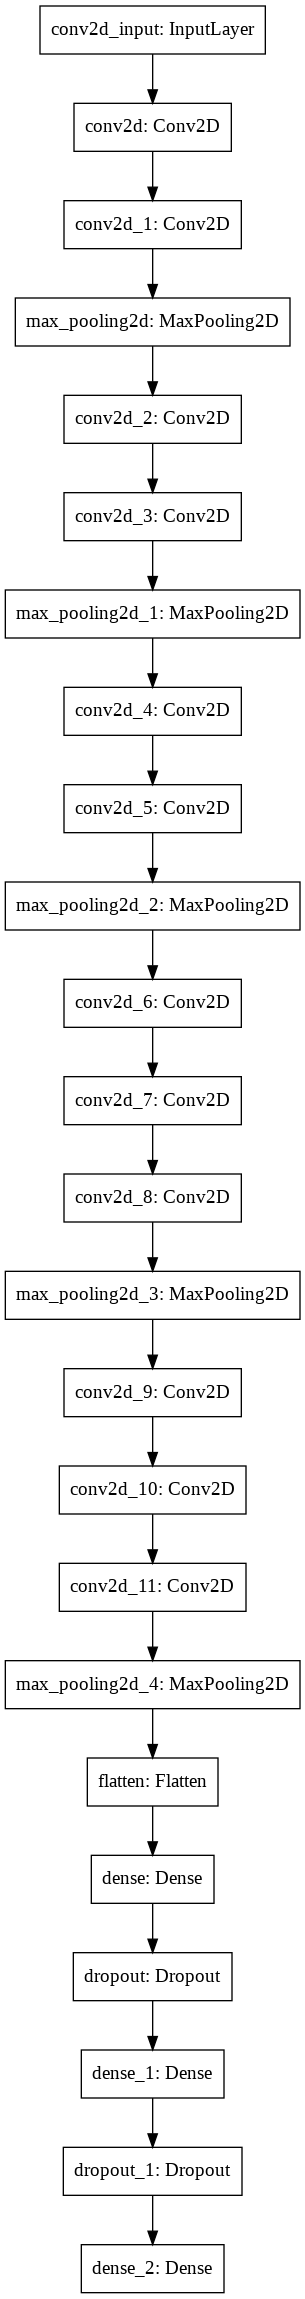

In [7]:
vgg16_model.plot_model()